[Reference1](https://towardsdatascience.com/word-clouds-in-python-comprehensive-example-8aee4343c0bf) <br>
[Reference2](http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/)

In [2]:
!pip install pdfminer

     |████████████████████████████████| 4.2MB 2.9MB/s 
     |████████████████████████████████| 13.7MB 277kB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-cp36-none-any.whl size=6140075 sha256=b872a5ca37d29a46d9e9f3abb4a2e9d575f6cd16852a6800b19df4783f2d951e
  Stored in directory: /root/.cache/pip/wheels/e1/00/af/720a55d74ba3615bb4709a3ded6dd71dc5370a586a0ff6f326
Successfully built pdfminer


In [5]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks')
!pwd

Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [6]:
#importing packages
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'fw9.pdf')
print(text)

Form    W-9(Rev. October 2018)Department of the Treasury  Internal Revenue Service Request for Taxpayer Identification Number and Certification▶ Go to www.irs.gov/FormW9 for instructions and the latest information.Give Form to the  requester. Do not send to the IRS.Print or type. See Specific Instructions on page 3.1  Name (as shown on your income tax return). Name is required on this line; do not leave this line blank.2  Business name/disregarded entity name, if different from above3  Check appropriate box for federal tax classification of the person whose name is entered on line 1. Check only one of the following seven boxes. Individual/sole proprietor or single-member LLC C CorporationS CorporationPartnershipTrust/estateLimited liability company. Enter the tax classification (C=C corporation, S=S corporation, P=Partnership) ▶ Note: Check the appropriate box in the line above for the tax classification of the single-member owner.  Do not check LLC if the LLC is classified as a single

# Text Preprocessing

In [7]:
#importing packeges for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

#--------------------------------------------------------------------------------------

#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#--------------------------------------------------------------------------------------
#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()
print(text)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Form W-(Rev October Department Treasury Internal Revenue Service Request Taxpayer Identification Number Certification▶ Go www.irs.gov/FormW instructions latest information.Give Form requester Do send IRS.Print type See Specific Instructions page Name shown income tax return Name required line leave line blank Business name/disregarded entity name different Check appropriate box federal tax classification person whose name entered line Check one following seven boxes Individual/sole proprietor single-member LLC C CorporationS CorporationPartnershipTrust/estateLimited liability company Enter tax classification C=C corporation S=S corporation P=Partnership ▶ Note Check appropriate box line tax classification single-member owner Do check LLC LLC classified single-member LLC disregarded owner unless owner LLC another LLC disregarded owner U.S federal tax purposes Otherwise single-member LLC disregarded owner check appropriate box tax classification owner.Other see instructions ▶ Exemptions 

# WordCloud

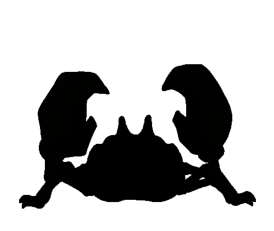

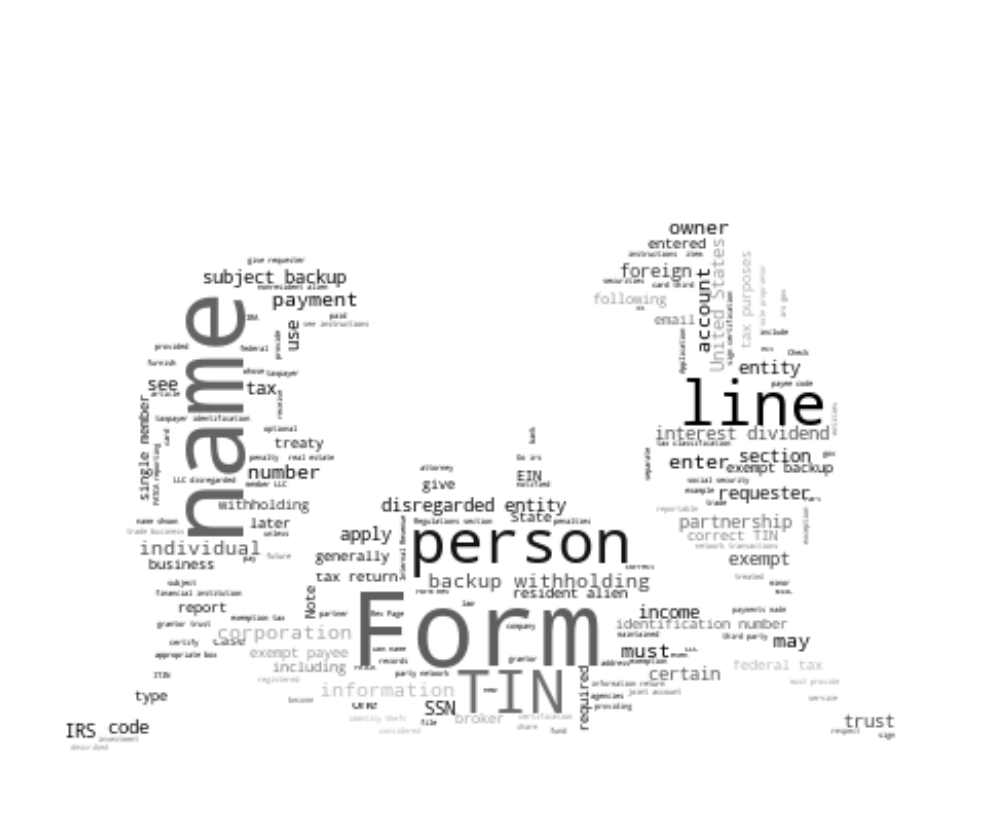

In [8]:
#importing packages
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------

#setting mask image
mask = np.array(Image.open(r'krabby.png'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()